In [2]:
import gym
import MyFrozenLakes
import numpy as np
import pandas as pd
import common
import random

import matplotlib.pyplot as plt
import seaborn as sns

from importlib import reload

import gym
from gym.envs.toy_text.frozen_lake import generate_random_map

In [3]:
title_fontsize = 24
fontsize = 24
legend_fontsize = 18
default_figure_size = (15, 8)

PROBLEM = "Frozen Lakes"

In [4]:
def plot_frozen_lake_problem_space(env, size):
    all_directions = '\u2194\u2195'
    fig = plt.figure(figsize=default_figure_size)
    ax = fig.add_subplot(111)
    plt.xlim((0, size))
    plt.ylim((0, size))
    plt.title("Frozen Lake State Space -0.001 per move")
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    for col in range(size):
        for row in range(size):
            text = all_directions
            y = size - col - 1
            x = row
            map_desc = env.desc[col, row]
            tile_color = "white"
            arrow_color = "black"
            if map_desc == b'H':
                tile_color = "black"
                arrow_color = "white"
                text = "-1"
            elif map_desc == b'G':
                tile_color = "green"
                arrow_color = "white"
                text = "+10"
            elif map_desc == b'S':
                tile_color = "yellow"
                
            p = plt.Rectangle([x, y], 1, 1, facecolor=tile_color, edgecolor="black")
            ax.add_patch(p)
            text = ax.text(x+0.5, y+0.5, text, horizontalalignment='center', verticalalignment='center', color=arrow_color)

def plot_frozen_lake_policy(env, policy, title='title', comparison = None):
#     LEFT = 0
#     DOWN = 1
#     RIGHT = 2
#     UP = 3
    if comparison is not None:
        comparison_map = (policy == comparison)
    direction_lookup = {1:'⬇', 3:'⬆', 0:'⬅', 2:'➡'}
    fig = plt.figure(figsize=default_figure_size)
    ax = fig.add_subplot(111)
    plt.xlim((0, policy.shape[1]))
    plt.ylim((0, policy.shape[0]))
    plt.title(title)
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    for col in range(policy.shape[0]):
        for row in range(policy.shape[1]):
            y = policy.shape[0] - col - 1
            x = row
            map_desc = env.desc[col, row]
            tile_color = "white"
            arrow_color = "black"
            if map_desc == b'H':
                tile_color = "black"
                arrow_color = "white"
            elif map_desc == b'G':
                tile_color = "green"
                arrow_color = "white"
            elif map_desc == b'S':
                tile_color = "yellow"
            if comparison is not None:
                if not comparison_map[col, row]:
                    tile_color = "red"
                
            p = plt.Rectangle([x, y], 1, 1, facecolor=tile_color, edgecolor="black")
            ax.add_patch(p)
            text = ax.text(x+0.5, y+0.5, direction_lookup[policy[col, row]], horizontalalignment='center', verticalalignment='center', color=arrow_color)
    plt.show()

In [5]:
def average_value_of_policy(env, policy, iterations=1000):
    rewards = []
    for i in range(iterations):
        done = False
        state = env.reset()
        iter_reward = 0
        while not done:
            state, reward, done, info = env.step(int(policy[state]))
            iter_reward += reward

        rewards.append(iter_reward)
    return np.mean(rewards)


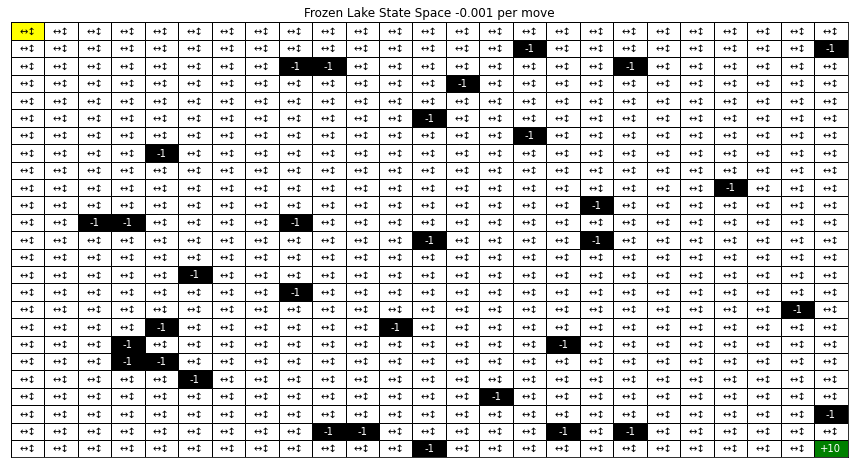

In [18]:
reload(MyFrozenLakes)
random.seed(2)
np.random.seed(2)

generate_size = 25
random_map = generate_random_map(size=generate_size, p=0.95)
reshape_size = (generate_size, generate_size)
env = MyFrozenLakes.FrozenLakeEnv(desc=random_map, is_slippery=True)

env.reset()
plot_frozen_lake_problem_space(env, generate_size)

In [19]:
def gamma_parameter_tuning(env, agent_type='Policy Iteration'):
    iterations_list = []
    average_values_list = []
    times_list = []
    title = "Change In Policy With Discount Factor\n{}".format(agent_type)
    gammas = [0.1, 0.25, 0.5, 0.7, 0.8, 0.9, 0.95]

    for gamma in gammas:
        print("Running Gamma = {}".format(gamma))
        if agent_type == 'Policy Iteration':
            optimal_value_function, iterations, max_values, average_values, times, errors =\
            common.policy_iteration(env=env,gamma=gamma)
        elif agent_type == 'Value Iteration':
            optimal_value_function, iterations, max_values, average_values, times, errors =\
            common.value_iteration(env=env,gamma=gamma)

        iterations_list.append(iterations)
        times_list.append(times)
        average_values_list.append(average_values)
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=default_figure_size, sharex=True)
    fig.suptitle(title, fontsize=18)

    ax1.set_xlabel("Iterations", fontsize=16)
    ax2.set_xlabel("Iterations", fontsize=16)
        
    plt.setp(ax1.get_yticklabels(), fontsize=16)
    plt.setp(ax2.get_yticklabels(), fontsize=16)
    
    plt.setp(ax1.get_xticklabels(), fontsize=16)
    plt.setp(ax2.get_xticklabels(), fontsize=16)
    
    for iters, av, t, gamma in zip(iterations_list, average_values_list, times_list, gammas):
            ax1.plot(iters, av, label='Discount Factor: {:.2f}'.format(gamma))
            ax2.plot(iters, t, label='Discount Factor: {:.2f}'.format(gamma))
            
    ax1.set_ylabel("Average Reward", fontsize=16)
    ax2.set_ylabel("Time (s)", fontsize=16)
    ax1.legend(fontsize=12, loc='best')
    ax2.legend(fontsize=12, loc='best')
    ax1.grid()
    ax2.grid()
    plt.show()

Running Gamma = 0.1
Policy-Iteration converged at step 5.
Running Gamma = 0.25
Policy-Iteration converged at step 5.
Running Gamma = 0.5
Policy-Iteration converged at step 7.
Running Gamma = 0.7
Policy-Iteration converged at step 7.
Running Gamma = 0.8
Policy-Iteration converged at step 7.
Running Gamma = 0.9
Policy-Iteration converged at step 8.
Running Gamma = 0.95
Policy-Iteration converged at step 7.


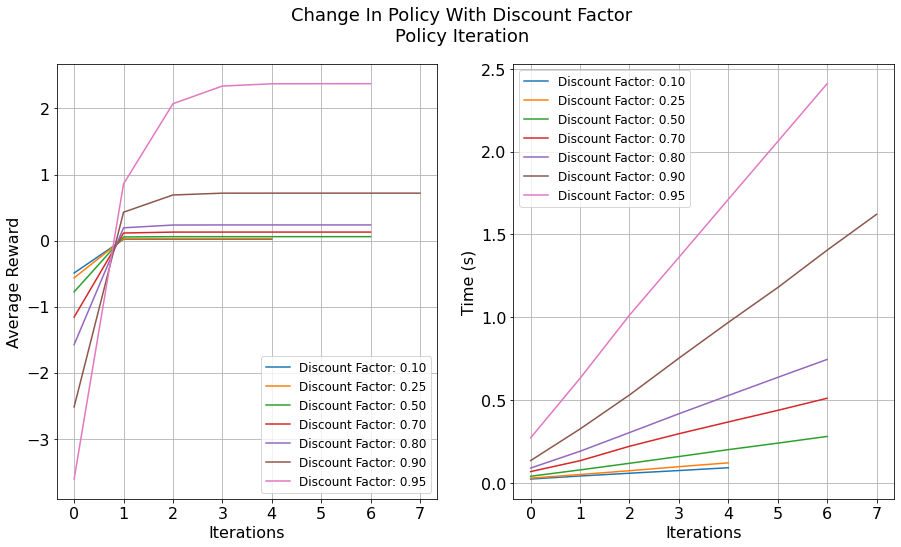

In [20]:
gamma_parameter_tuning(env, agent_type='Policy Iteration')

Running Gamma = 0.1
Value-iteration converged at iteration# 8.
Running Gamma = 0.25
Value-iteration converged at iteration# 13.
Running Gamma = 0.5
Value-iteration converged at iteration# 25.
Running Gamma = 0.7
Value-iteration converged at iteration# 48.
Running Gamma = 0.8
Value-iteration converged at iteration# 78.
Running Gamma = 0.9
Value-iteration converged at iteration# 155.
Running Gamma = 0.95
Value-iteration converged at iteration# 251.


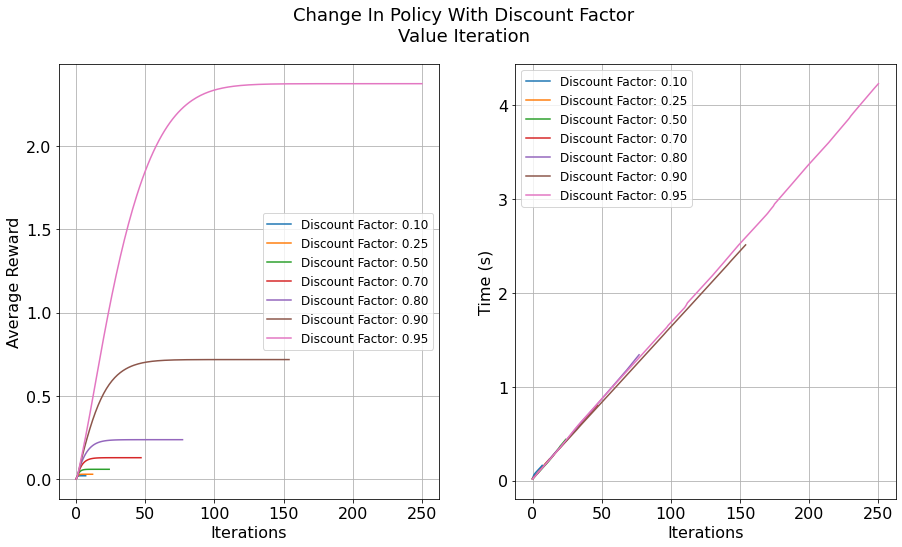

In [21]:
gamma_parameter_tuning(env, agent_type='Value Iteration')

Value-iteration converged at iteration# 155.


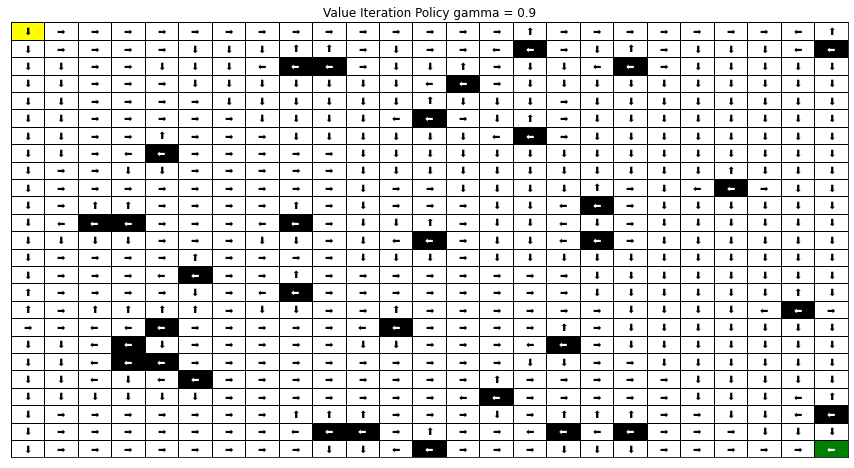

49.843756
Value-iteration converged at iteration# 251.


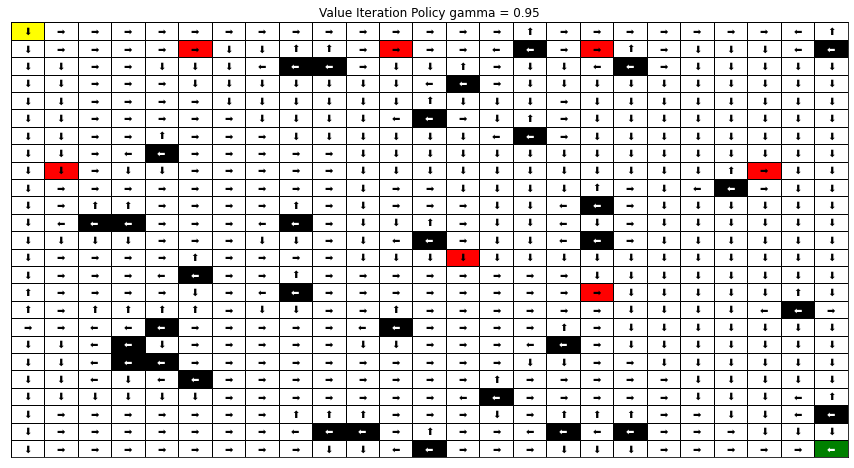

49.841678


In [22]:
reload(common)
optimal_value_function, iterations, max_values, average_values, times, errors =\
common.value_iteration(env=env,gamma=0.9)
optimal_value_policy_gamma_9 = common.extract_policy(optimal_value_function, env, gamma=0.9)
plot_frozen_lake_policy(env, optimal_value_policy_gamma_9.reshape(reshape_size), title="Value Iteration Policy gamma = 0.9")
print(average_value_of_policy(env, optimal_value_policy_gamma_9))

optimal_value_function, iterations, max_values, average_values, times, errors =\
common.value_iteration(env=env,gamma=0.95)
optimal_value_policy_gamma_95 = common.extract_policy(optimal_value_function, env, gamma=0.95)
plot_frozen_lake_policy(env, optimal_value_policy_gamma_95.reshape(reshape_size), comparison=optimal_value_policy_gamma_9.reshape(reshape_size), title="Value Iteration Policy gamma = 0.95")
print(average_value_of_policy(env, optimal_value_policy_gamma_95))

Policy-Iteration converged at step 8.
49.842864


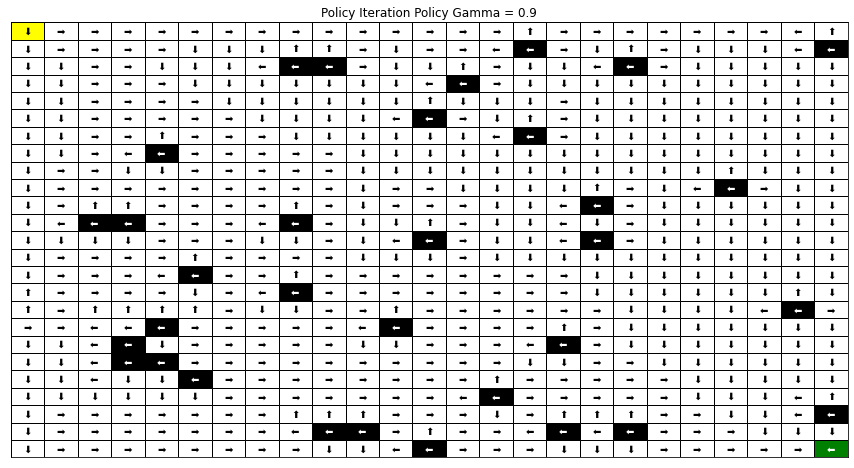

Policy-Iteration converged at step 8.
49.841796


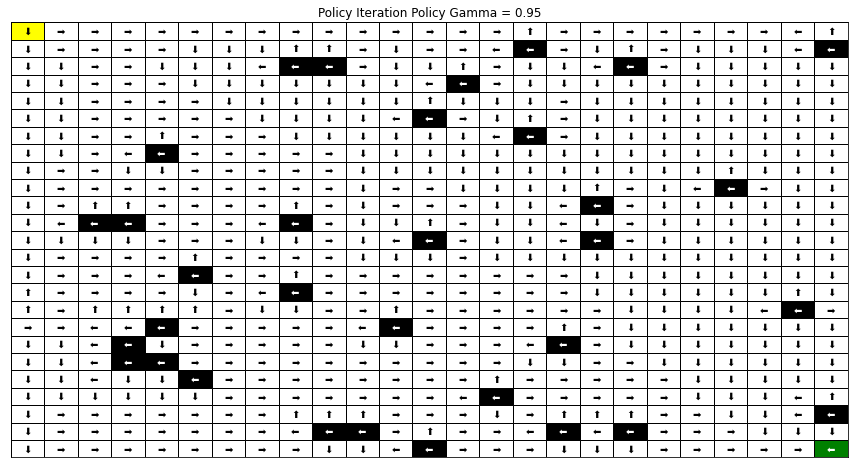

In [23]:
optimal_policy_policy_gamma_9, iterations, max_values, average_values, times, errors = common.policy_iteration(env, gamma=0.9)
print(average_value_of_policy(env, optimal_policy_policy_gamma_9))
plot_frozen_lake_policy(env, optimal_policy_policy_gamma_9.reshape(reshape_size), title="Policy Iteration Policy Gamma = 0.9")

optimal_policy_policy_gamma_95, iterations, max_values, average_values, times, errors = common.policy_iteration(env, gamma=0.9)
print(average_value_of_policy(env, optimal_policy_policy_gamma_95))
plot_frozen_lake_policy(env, optimal_policy_policy_gamma_95.reshape(reshape_size), comparison=optimal_policy_policy_gamma_9.reshape(reshape_size), title="Policy Iteration Policy Gamma = 0.95")


In [24]:
def pi_vi_convergence_plot(env, gamma, agent_type='Policy Iteration', x_tick_spacing=10):
    title = "{} Convergence Plot for {}\n Discount Factor = {}".format(agent_type, PROBLEM, gamma)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=default_figure_size, sharex=True)
    fig.suptitle(title, fontsize=18)

    ax1.set_xlabel("Iterations", fontsize=16)
    ax2.set_xlabel("Iterations", fontsize=16)
    ax3.set_xlabel("Iterations", fontsize=16)
        
    plt.setp(ax1.get_yticklabels(), fontsize=16)
    plt.setp(ax2.get_yticklabels(), fontsize=16)
    plt.setp(ax3.get_yticklabels(), fontsize=16)
    
    plt.setp(ax1.get_xticklabels(), fontsize=16)
    plt.setp(ax2.get_xticklabels(), fontsize=16)
    plt.setp(ax3.get_xticklabels(), fontsize=16)
    
    if agent_type == 'Policy Iteration':
        optimal_value_function, iterations, max_values, average_values, times, errors =\
        common.policy_iteration(env=env,gamma=gamma)
        print("Converged in {} seconds".format(times[-1]))
    elif agent_type == 'Value Iteration':
        optimal_value_function, iterations, max_values, average_values, times, errors =\
        common.value_iteration(env=env,gamma=gamma)
        print("Converged in {} seconds".format(times[-1]))
    
    ax1.plot(iterations, average_values, label='Mean V', color="blue")
    ax2.plot(iterations, errors, label="Error", color="orange")
    ax3.plot(iterations, times, label="Time", color="green")
    
    ax1.set_ylabel("Average Utility", fontsize=16)
    ax2.set_ylabel("Error", fontsize=16)
    ax3.set_ylabel("Time (s)", fontsize=16)
    
    ax1.set_xticks([i for i in range(0, max(iterations)+x_tick_spacing, x_tick_spacing)])
    ax2.set_xticks([i for i in range(0, max(iterations)+x_tick_spacing, x_tick_spacing)])
    ax3.set_xticks([i for i in range(0, max(iterations)+x_tick_spacing, x_tick_spacing)])
        
    ax1.grid()
    ax2.grid()
    ax3.grid()
    
    plt.tight_layout()
    plt.show()

In [25]:
reload(common)
optimal_policy_policy, iterations, max_values, average_values, times, errors = common.policy_iteration(env, gamma=0.9)

Policy-Iteration converged at step 8.


Value-iteration converged at iteration# 155.
Converged in 2.5967278480529785 seconds


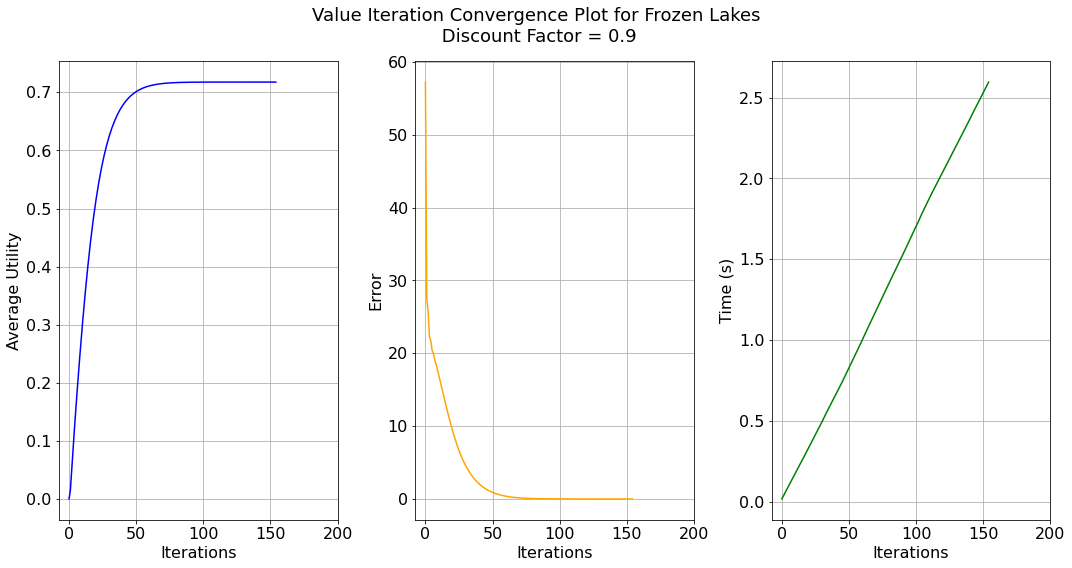

In [26]:
pi_vi_convergence_plot(env, 0.9, agent_type='Value Iteration', x_tick_spacing=50)

Policy-Iteration converged at step 8.
Converged in 1.6223406791687012 seconds


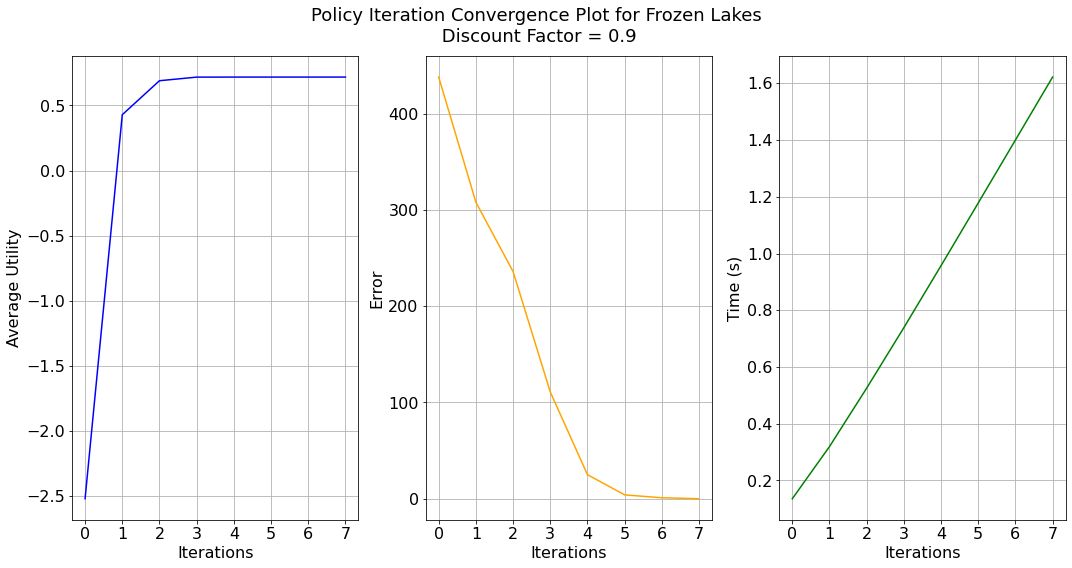

In [27]:
pi_vi_convergence_plot(env, 0.9, agent_type='Policy Iteration', x_tick_spacing=1)

Value-iteration converged at iteration# 156.
Policy-Iteration converged at step 8.


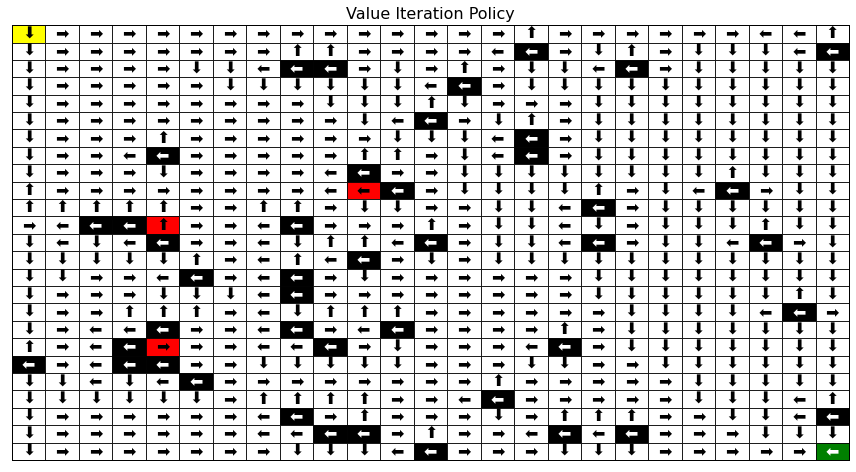

49.82081600000001
49.823085


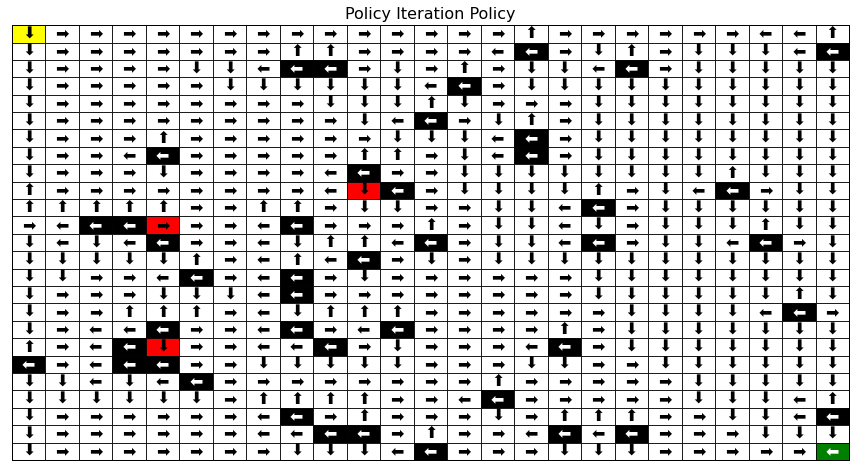

In [90]:
reload(common)
optimal_value_function, iterations, max_values, average_values, times, errors =\
common.value_iteration(env=env,gamma=0.9)
optimal_value_policy = common.extract_policy(optimal_value_function, env, gamma=0.9)

optimal_policy_policy, iterations, max_values, average_values, times, errors = common.policy_iteration(env, gamma=0.9)

plot_frozen_lake_policy(env, optimal_value_policy.reshape(reshape_size), comparison=optimal_policy_policy.reshape(reshape_size), title="Value Iteration Policy")
print(average_value_of_policy(env, optimal_value_policy))

print(average_value_of_policy(env, optimal_policy_policy))
plot_frozen_lake_policy(env, optimal_policy_policy.reshape(reshape_size), comparison=optimal_value_policy.reshape(reshape_size), title="Policy Iteration Policy")


In [77]:
reload(common)
reload(MyFrozenLakes)

random_map = generate_random_map(size=50, p=0.93)
env_50 =  MyFrozenLakes.FrozenLakeEnv(desc=random_map, is_slippery=True)
random_map = generate_random_map(size=8, p=0.93)
env_8 =  MyFrozenLakes.FrozenLakeEnv(desc=random_map, is_slippery=True)

envs = [env_8, env, env_50]
size_compare = []
sizes = [8, 25, 50]
q_learning_iterations = [100000, 200000, 300000]
for env_s, s, iters in zip(envs, sizes, q_learning_iterations):
    optimal_value_function, iterations, max_values, average_values, times, errors =\
    common.value_iteration(env=env_s,gamma=0.9)
    optimal_value_policy = common.extract_policy(optimal_value_function, env_s, gamma=0.9)
    value_policy_score = average_value_of_policy(env_s, optimal_value_policy)
    
    print("size = {} vi num_iterations = {} time = {} mean_value = {}".format(s, max(iterations), max(times), value_policy_score))
    size_compare.append({"problem size": s, "algorithm": "Value Iteration", "time": max(times), "iterations": max(iterations), "value": value_policy_score})
    print()

    optimal_policy_policy, iterations, max_values, average_values, times, errors = common.policy_iteration(env_s, gamma=0.9)
    policy_policy_score = average_value_of_policy(env_s, optimal_policy_policy)
    
    print("size = {} pi num_iterations = {} time = {} mean_value = {}".format(s, max(iterations), max(times), policy_policy_score))
    print()
    print("Value Iteration policy equals Policy Iteration Policy ", np.all(optimal_value_policy == optimal_policy_policy))
    size_compare.append({"problem size": s, "algorithm": "Policy Iteration", "time": max(times), "iterations" :max(iterations), "value": policy_policy_score})
    print()
        
    ql = common.Q_Learner(env_s, gamma = 0.9, epsilon=0.5, alpha=0.9, epsilon_decay=0.9)
    average_values, times, iterations = ql.run(iters)
    q_policy, value = ql.extract_policy()
    q_policy_score = average_value_of_policy(env_s, q_policy)

    print("size = {} q num_iterations = {} time = {} mean_value = {}".format(s, max(iterations), max(times), q_policy_score))
    print()
    print("Q Learning Policy equals policy iteration ", np.all(q_policy == optimal_policy_policy))
    size_compare.append({"problem size": s, "algorithm": "Q Learning", "time": max(times), "iterations" :max(iterations), 'value': q_policy_score})
    print()

Value-iteration converged at iteration# 112.
size = 8 vi num_iterations = 111 time = 0.16138553619384766 mean_value = 49.949678999999996

Policy-Iteration converged at step 8.
size = 8 pi num_iterations = 7 time = 0.08651065826416016 mean_value = 49.951191

Value Iteration policy equals Policy Iteration Policy  False

size = 8 q num_iterations = 99900 time = 59.43132567405701 mean_value = 49.945799

Q Learning Policy equals policy iteration  False

Value-iteration converged at iteration# 156.
size = 25 vi num_iterations = 155 time = 2.313077688217163 mean_value = 49.824101999999996

Policy-Iteration converged at step 8.
size = 25 pi num_iterations = 7 time = 1.1676180362701416 mean_value = 49.82321799999999

Value Iteration policy equals Policy Iteration Policy  False

size = 25 q num_iterations = 199900 time = 494.38970160484314 mean_value = 49.760259999999995

Q Learning Policy equals policy iteration  False

Value-iteration converged at iteration# 166.
size = 50 vi num_iterations = 

In [78]:
def plot_problem_size(df):
    title = "{} Problem Size Comparison".format(PROBLEM)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=default_figure_size, sharex=True)
    fig.suptitle(title, fontsize=18)

    ax1.set_yscale('log')
    ax2.set_yscale('log')
    
    fontsize=16
    plt.setp(ax1.get_yticklabels(), fontsize=fontsize)
    plt.setp(ax2.get_yticklabels(), fontsize=fontsize)
    plt.setp(ax3.get_yticklabels(), fontsize=fontsize)
    
    plt.setp(ax1.get_xticklabels(), fontsize=fontsize)
    plt.setp(ax2.get_xticklabels(), fontsize=fontsize)
    plt.setp(ax3.get_xticklabels(), fontsize=fontsize)
    
    sns.set_context("paper", rc={"font.size": fontsize, "axes.titlesize": fontsize, "axes.labelsize": fontsize})
    sns.barplot(x='problem size', y='iterations', hue='algorithm', data=df, ax=ax1)
    sns.barplot(x='problem size', y='time', hue='algorithm', data=df, ax=ax2)
    sns.barplot(x='problem size', y='value', hue='algorithm', data=df, ax=ax3)
    
    plt.tight_layout()
    plt.show()

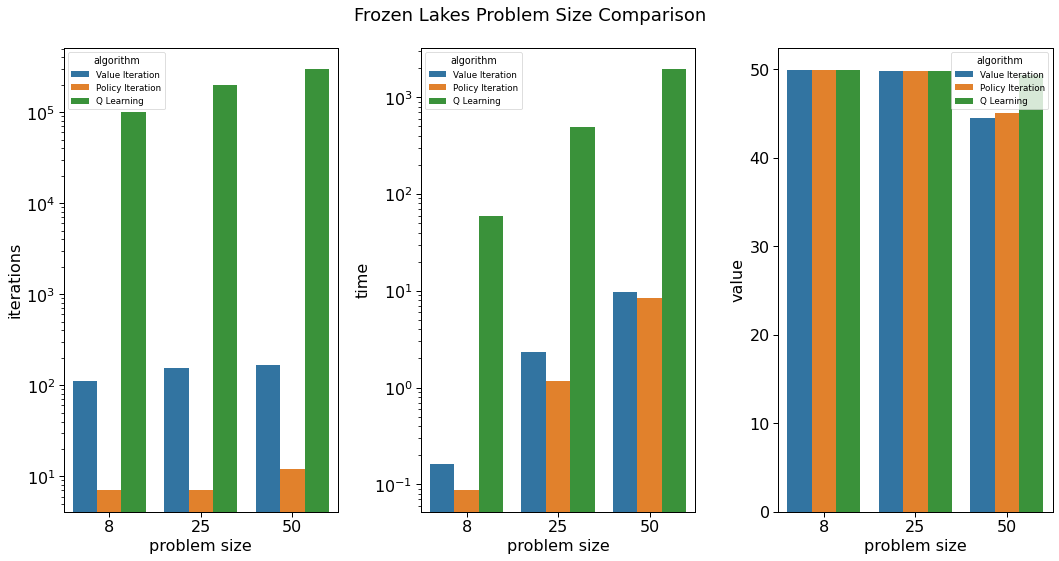

In [79]:
df = pd.DataFrame(size_compare)
plot_problem_size(df)

Value-iteration converged at iteration# 156.
Policy-Iteration converged at step 8.


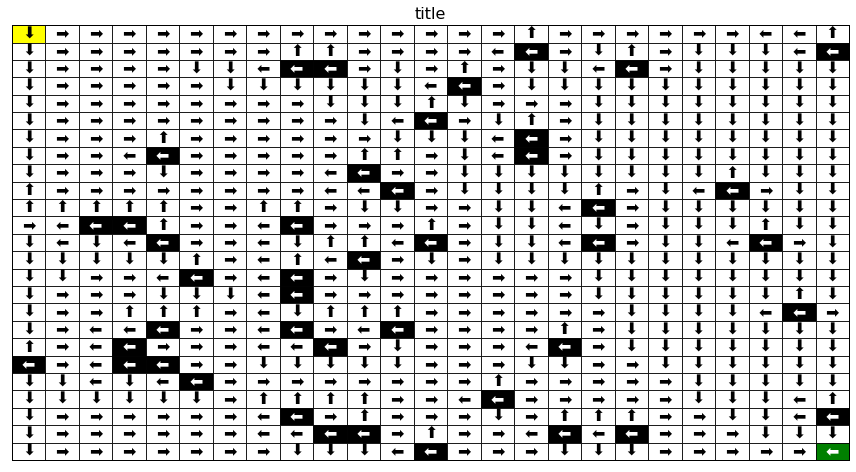

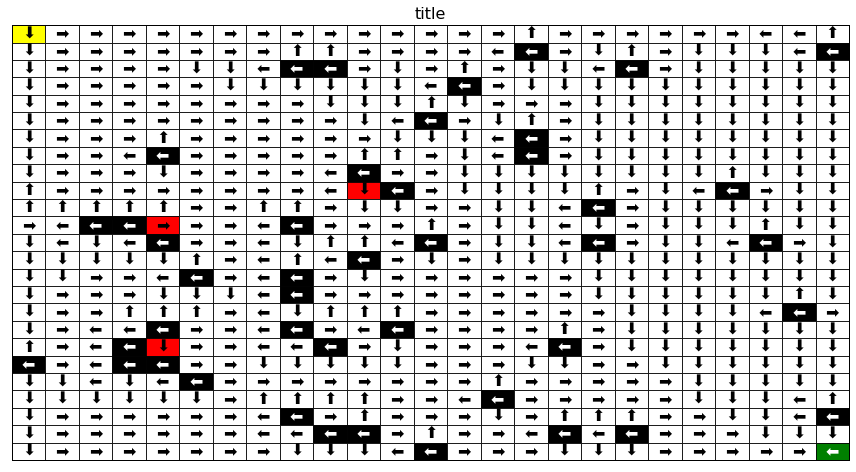

In [80]:
optimal_value_function, iterations, max_values, average_values, times, errors =\
common.value_iteration(env=env,gamma=0.9)
optimal_value_policy = common.extract_policy(optimal_value_function, env, gamma=0.9)

optimal_policy_policy, iterations, max_values, average_values, times, errors = common.policy_iteration(env, gamma=0.9)

plot_frozen_lake_policy(env, optimal_value_policy.reshape(reshape_size))
plot_frozen_lake_policy(env, optimal_policy_policy.reshape(reshape_size), comparison=optimal_value_policy.reshape(reshape_size))

In [82]:
reload(common)
ql = common.Q_Learner(env, gamma = 0.9, epsilon=0.5, alpha=0.9, epsilon_decay=0.9)
average_values, times, iterations = ql.run(200000)
q_policy, value = ql.extract_policy()


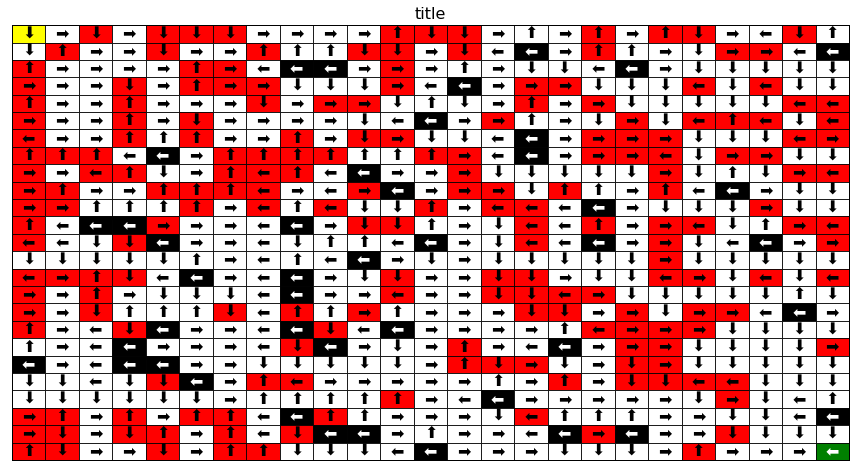

In [83]:
plot_frozen_lake_policy(env, q_policy.reshape(reshape_size), comparison=optimal_value_policy.reshape(reshape_size))

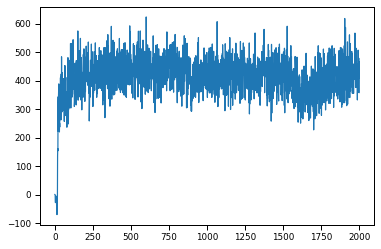

In [84]:
plt.plot(average_values)

In [85]:
print(average_value_of_policy(env, optimal_value_policy, iterations=10000))
print(average_value_of_policy(env, optimal_policy_policy,  iterations=10000))
print(average_value_of_policy(env, q_policy,  iterations=10000))


49.810070399999994
49.768836300000004
49.7446781


Running epsilon = 0.1
Time Taken: 258.03397846221924s
Running epsilon = 0.2
Time Taken: 290.95515418052673s
Running epsilon = 0.4
Time Taken: 258.03448152542114s
Running epsilon = 0.5
Time Taken: 258.535756111145s
Running epsilon = 0.6
Time Taken: 262.16690826416016s
Running epsilon = 0.7
Time Taken: 286.0024960041046s
Running epsilon = 0.9
Time Taken: 268.9606158733368s
Running epsilon = 0.95
Time Taken: 260.88280415534973s


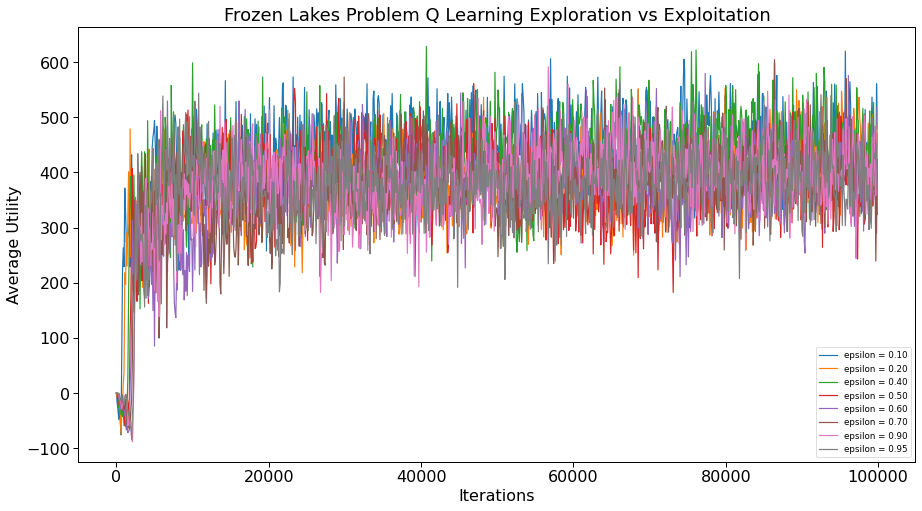

In [54]:
reload(common)
epsilon_list = [0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.9, 0.95]
plt.figure(figsize=default_figure_size)
title = "{} Problem Q Learning Exploration vs Exploitation".format(PROBLEM)
plt.title(title, fontsize=18)

for epsilon in epsilon_list:
    print("Running epsilon = {}".format(epsilon))
    ql = common.Q_Learner(env, alpha=0.9, gamma = 0.9, epsilon=epsilon, epsilon_decay=0.9)
    average_values, times, iterations = ql.run(100000)

    plt.plot(iterations, average_values, label='epsilon = {:.2f}'.format(epsilon))
    print("Time Taken: {}s".format(times[-1]))

plt.xlabel('Iterations', fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('Average Utility', fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.legend()
plt.show()

Running alpha = 0.1
Time Taken: 239.89499139785767s
Running alpha = 0.2
Time Taken: 204.7112581729889s
Running alpha = 0.4
Time Taken: 201.12406849861145s
Running alpha = 0.5
Time Taken: 217.97149324417114s
Running alpha = 0.6
Time Taken: 213.20373129844666s
Running alpha = 0.7
Time Taken: 228.73576045036316s
Running alpha = 0.9
Time Taken: 266.3390383720398s
Running alpha = 0.95
Time Taken: 255.9446382522583s


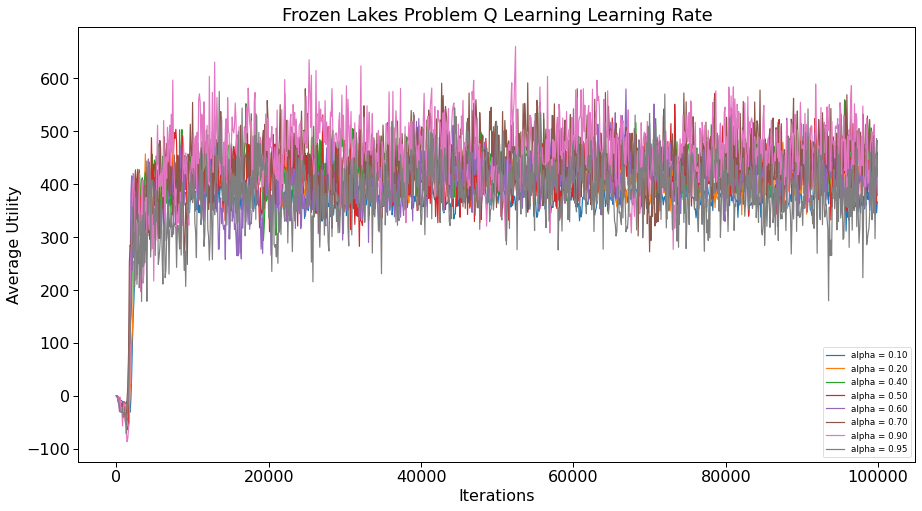

In [55]:
np.random.seed(0)
alpha_list = [0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.9, 0.95]
plt.figure(figsize=default_figure_size)
title = "{} Problem Q Learning Learning Rate".format(PROBLEM)
plt.title(title, fontsize=18)
for alpha in alpha_list:
    print("Running alpha = {}".format(alpha))
    ql = common.Q_Learner(env, gamma = 0.9, alpha=alpha, epsilon=0.5, epsilon_decay=0.9)
    average_values, times, iterations = ql.run(100000)

    plt.plot(iterations, average_values, label='alpha = {:.2f}'.format(alpha))
    print("Time Taken: {}s".format(times[-1]))

plt.xlabel('Iterations', fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('Average Utility', fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.legend()
plt.show()

Running epsilon = 0.5
Time Taken: 321.0321478843689s
Running epsilon = 0.8
Time Taken: 230.58234333992004s
Running epsilon = 0.9
Time Taken: 218.9701156616211s
Running epsilon = 0.95
Time Taken: 222.73646020889282s
Running epsilon = 0.99
Time Taken: 217.9590141773224s


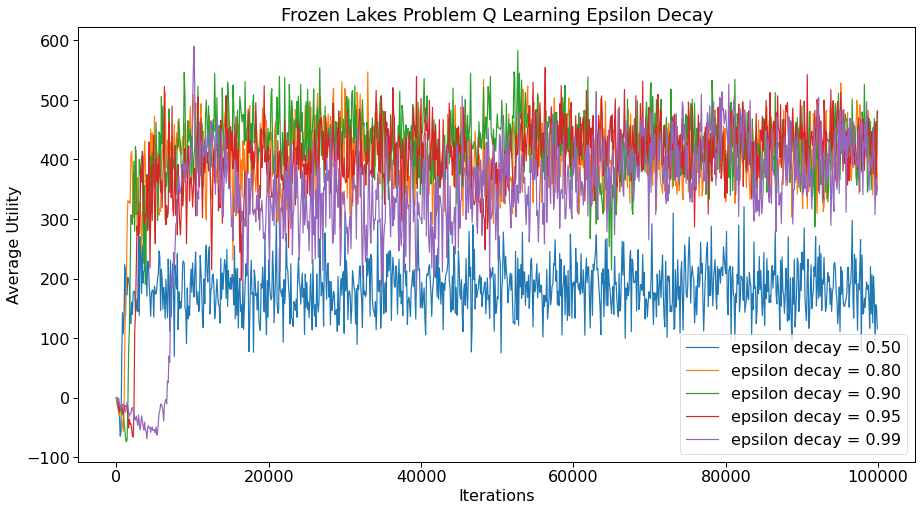

In [53]:
reload(common)
np.random.seed(0)
epsilon_decay_list = [0.5, 0.8, 0.9, 0.95, 0.99]
plt.figure(figsize=default_figure_size)
title = "{} Problem Q Learning Epsilon Decay".format(PROBLEM)
plt.title(title, fontsize=18)
for epsilon_decay in epsilon_decay_list:
    print("Running epsilon_decay = {}".format(epsilon_decay))
    ql = common.Q_Learner(env, alpha=0.6, gamma = 0.9, epsilon=0.5, epsilon_decay=epsilon_decay)
    average_values, times, iterations = ql.run(100000)

    plt.plot(iterations, average_values, label='epsilon decay = {:.2f}'.format(epsilon_decay))
    print("Time Taken: {}s".format(times[-1]))

plt.xlabel('Iterations', fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('Average Utility', fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.show()